In [1]:
import pandas as pd 
import numpy as np 
import json
from matplotlib import pyplot as plt


In [2]:
concise_helix_file = open('../outputs/brokenHelix/concise_report.json')
concise_helix_file= json.load(concise_helix_file)
del concise_helix_file[-1] ## run this only once 

In [3]:
def getCoordinateList(atom_record):
    #returns the X, Y, Z coordinates in the form of a list 
    xCoord = float(atom_record[30:38]);
    yCoord = float(atom_record[38:46]);
    zCoord = float(atom_record[46:54]);
    return [xCoord, yCoord, zCoord];

In [4]:
helix_len_dict = {};
num_helices = 0 ; 
pdb_ids =0 
for pdb_info in concise_helix_file: 
    pdb_ids= pdb_ids + 1;

    helices_list = pdb_info['helices'];
    for ind_helix in helices_list:
        num_helices = num_helices + 1; 
        helix_len = ind_helix['helix_length'];
        if(helix_len not in helix_len_dict.keys() ):
            helix_len_dict[helix_len]= 1 ;
        else: 
            helix_len_dict[helix_len]= helix_len_dict[helix_len]+1 ;
print("Total Number of helices are ",num_helices)

Total Number of helices are  51162


In [5]:
def getOnlyCAlpha(helix_list):
    CAlphaHelixList=[]
    for indHelix in helix_list:
        CAlphaHelix= []
        for indRes in indHelix:
            
            if(indRes[13:15]=="CA"):
               # print("YES")
                CAlphaHelix.append(indRes);
        CAlphaHelixList.append(CAlphaHelix);
    return CAlphaHelixList;

In [6]:
def getBrokenAndUnbrokenHelixFixedLen(concise_helix_file, len_helix ):
    broken_helices =[]; 
    normal_helices =[]; 
    for pdb_info in concise_helix_file: 
        helices_list = pdb_info['helices'];
        for ind_helix in helices_list:
            #print(ind_helix)
            helix_len = ind_helix['helix_length']
            if(helix_len == len_helix):
               # print(len(ind_helix['broken_regions']));
                if(len(ind_helix['broken_regions']) > 4):
                    broken_helices.append(ind_helix['mainChainHelix_residues']); 
                else : 
                    normal_helices.append(ind_helix['mainChainHelix_residues']); 
    return broken_helices, normal_helices;

In [32]:
def norm_centroid_zero(xData,yData,zData):
    xCentroid = sum(xData)/len(xData);
    yCentroid = sum(yData)/len(yData);
    zCentroid = sum(zData)/len(zData);
    xData= [x-xCentroid for x in xData]
    yData=[y-yCentroid for y in yData]
    zData=[z-zCentroid for z in zData]

    return(xData,yData,zData);


In [7]:
broken_helices, normal_helices= getBrokenAndUnbrokenHelixFixedLen(concise_helix_file, 19)
broken_helices=getOnlyCAlpha(broken_helices);
normal_helices=getOnlyCAlpha(normal_helices);


19
19
19
19


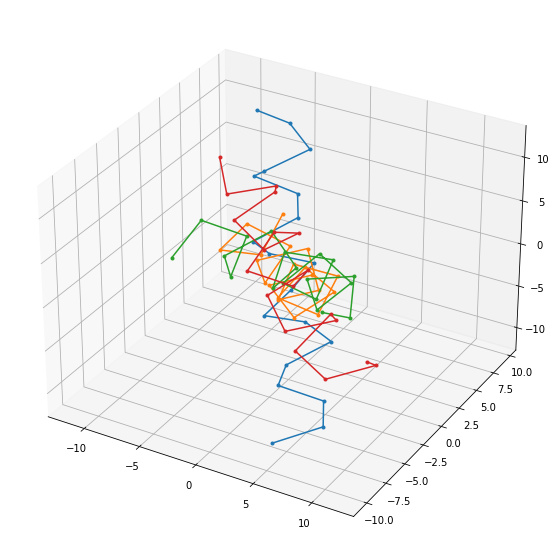

In [38]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

for helix in broken_helices[0:4]:
    xData=[];
    yData=[];
    zData=[];
    for atom_record in helix:
        [x,y,z]=getCoordinateList(atom_record);
        xData.append(x)
        yData.append(y)
        zData.append(z)
    xData,yData,zData= norm_centroid_zero(xData,yData,zData)
    print(len(xData))
    ax.plot3D(xData, yData, zData ,marker = '.');



In [29]:
xData - 1

TypeError: unsupported operand type(s) for -: 'list' and 'int'